In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import scipy.interpolate
import pickle

import scipy.ndimage as ndimage
%run ../pyfiles/data_cleaning.py

**Table of Contents**
1. <a href=#burned>MCD64A1 Burned Area</a>
2. <a href=#evapo>MOD16A2: EvapoTranspiration Data</a>
3. <a href=#veg>VNP13 Vegetation Indices</a>
4. <a href=#fire>VIIRS VNP14 Thermal Anomaly / Fire</a>
5. <a href=#fwi>Global Fire Weather Database: Fire Weather Index</a>
6. <a href=#merge>Merging Final Dataset</a>

<a id=burned></a>
### MCD64A1 Burned Area
Source: https://lpdaac.usgs.gov/products/mcd64a1v006/

In [2]:
burned = xr.open_mfdataset('../../finalproj_data/time_slice/MCD64A1.006_500m_aid0001.nc', combine = 'by_coords')
burnt = burned.sel(time = slice('2019-11-01','2019-11-01'))

In [3]:
# burnt['crs']
# Attributes:
#     grid_mapping_name:            latitude_longitude
#     _CoordinateAxisTypes:         GeoX GeoY
#     epsg_code:                    4326
#     horizontal_datum_name:        WGS84
#     semi_major_axis:              6378137
#     inverse_flattening:           298.257223563
#     longitude_of_prime_meridian:  0.0

In [4]:
burnt = burnt.drop_vars(['Burn_Date_Uncertainty', 'First_Day', 'Last_Day','crs', 'QA'])
burnt = burnt.squeeze('time')
burnt = burnt.drop('time')

<a id=evapo></a>
### MOD16A2: EvapoTranspiration Data 

In [5]:
# Load Data

EVAP = xr.open_mfdataset('../../finalproj_data/time_slice/MOD16A2.006_500m_aid0001.nc', combine='by_coords') 
# (lat: 12623, lon: 16707, time: 1)
# 1.687374337 GB
# Source: https://lpdaac.usgs.gov/products/mod16a2v006/
# Probably only going to take Total Evapotranspiration (ET_500m)
# Ignore for now - add if time. 


In [6]:
# <xarray.DataArray 'crs' ()>
# array(-127, dtype=int8)
# Coordinates:
#     time     object 2019-12-11 00:00:00
# Attributes:
#     grid_mapping_name:            latitude_longitude
#     _CoordinateAxisTypes:         GeoX GeoY
#     epsg_code:                    4326
#     horizontal_datum_name:        WGS84
#     semi_major_axis:              6378137
#     inverse_flattening:           298.257223563
#     longitude_of_prime_meridian:  0.0
EVAP = EVAP.drop_vars(['crs', 'ET_QC_500m'])
EVAP = EVAP.squeeze('time')
EVAP = EVAP.drop('time')

In [7]:
EVAP

<xarray.Dataset>
Dimensions:  (lat: 12623, lon: 16707)
Coordinates:
  * lat      (lat) float64 4.36 4.356 4.352 4.348 ... -48.22 -48.23 -48.23
  * lon      (lon) float64 96.33 96.33 96.34 96.34 ... 165.9 165.9 165.9 165.9
Data variables:
    ET_500m  (lat, lon) float32 dask.array<chunksize=(12623, 16707), meta=np.ndarray>
Attributes:
    title:        MOD16A2.006 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v2.34
    references:   See README.txt
    history:      See README.txt

<a id=veg></a>
### VNP13 Vegetation Indices
Source: https://lpdaac.usgs.gov/products/vnp13a2v001/

In [8]:
VEG = xr.open_mfdataset('../../finalproj_data/time_slice/VNP13A2.001_1km_aid0001.nc', combine = 'by_coords') #  (lat: 6312, lon: 8354, time: 1)
# Slice by time dimension so that this dataset is 1 dimension in time. 
VEG = VEG.sel(time = slice('2019-12-11', '2019-12-11'))
#2.953022425

In [9]:
# TWO
# <xarray.DataArray 'crs' ()>
# array(-127, dtype=int8)
# Attributes:
#     grid_mapping_name:            latitude_longitude
#     _CoordinateAxisTypes:         GeoX GeoY
#     epsg_code:                    4326
#     horizontal_datum_name:        WGS84
#     semi_major_axis:              6378137
#     inverse_flattening:           298.257223563
#     longitude_of_prime_meridian:  0.0

In [10]:
VEG = VEG.drop_vars(['crs', '_1_km_16_days_composite_day_of_the_year', '_1_km_16_days_VI_Quality','_1_km_16_days_pixel_reliability'])
VEG = VEG.squeeze('time')
VEG = VEG.drop('time')

In [11]:
VEG

<xarray.Dataset>
Dimensions:                          (lat: 6312, lon: 8354)
Coordinates:
  * lat                              (lat) float64 4.362 4.354 ... -48.22 -48.23
  * lon                              (lon) float64 96.33 96.34 ... 165.9 165.9
Data variables:
    _1_km_16_days_EVI                (lat, lon) float32 dask.array<chunksize=(6312, 8354), meta=np.ndarray>
    _1_km_16_days_EVI2               (lat, lon) float32 dask.array<chunksize=(6312, 8354), meta=np.ndarray>
    _1_km_16_days_NDVI               (lat, lon) float32 dask.array<chunksize=(6312, 8354), meta=np.ndarray>
    _1_km_16_days_NIR_reflectance    (lat, lon) float32 dask.array<chunksize=(6312, 8354), meta=np.ndarray>
    _1_km_16_days_SWIR1_reflectance  (lat, lon) float32 dask.array<chunksize=(6312, 8354), meta=np.ndarray>
    _1_km_16_days_SWIR2_reflectance  (lat, lon) float32 dask.array<chunksize=(6312, 8354), meta=np.ndarray>
    _1_km_16_days_SWIR3_reflectance  (lat, lon) float32 dask.array<chunksize=(6312, 8354), meta=np.ndarray>
    _1_km_16_days_blue_reflectance   (lat, lon) float32 dask.array<chunksize=(6312, 8354), meta=np.ndarray>
    _1_km_16_days_green_reflectance  (lat, lon) float32 dask.array<chunksize=(6312, 8354), meta=np.ndarray>
    _1_km_16_days_red_reflectance    (lat, lon) float32 dask.array<chunksize=(6312, 8354), meta=np.ndarray>
Attributes:
    title:        VNP13A2.001 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v2.34
    references:   See README.txt
    history:      See README.txt

<a id=fire></a>
### VIIRS VNP14 Thermal Anomaly / Fire

Source: https://lpdaac.usgs.gov/products/vnp14a1v001/

In [12]:
THREE = xr.open_mfdataset('../../finalproj_data/time_slice/VNP14A1.001_1km_aid0001.nc', combine = 'by_coords') # (lat: 6312, lon: 8354, time: 1)
#1.054726297 GB


# <xarray.DataArray 'crs' ()>
# array(-127, dtype=int8)
# Attributes:
#     grid_mapping_name:            latitude_longitude
#     _CoordinateAxisTypes:         GeoX GeoY
#     epsg_code:                    4326
#     horizontal_datum_name:        WGS84
#     semi_major_axis:              6378137
#     inverse_flattening:           298.257223563
#     longitude_of_prime_meridian:  0.0

In [13]:
THREE = THREE.drop_vars(['crs', 'QA', 'sample'])
THREE = THREE.squeeze('time')
viirs = THREE.drop('time')

In [14]:
# clean xarray dataset
viirs

<xarray.Dataset>
Dimensions:   (lat: 6312, lon: 8354)
Coordinates:
  * lat       (lat) float64 4.362 4.354 4.346 4.337 ... -48.21 -48.22 -48.23
  * lon       (lon) float64 96.33 96.34 96.35 96.35 ... 165.9 165.9 165.9 165.9
Data variables:
    FireMask  (lat, lon) float32 dask.array<chunksize=(6312, 8354), meta=np.ndarray>
    MaxFRP    (lat, lon) float64 dask.array<chunksize=(6312, 8354), meta=np.ndarray>
Attributes:
    title:        VNP14A1.001 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v2.34
    references:   See README.txt
    history:      See README.txt

<a id=fwi></a>
### Global Fire Weather Database: Fire Weather Index

In [15]:
# See data_collection1 for more information. 

# GFWD - FWI --> Dataset labels to identify "high risk of fire" based on FWI calculations.
# Convention to label DataSet in caps and DataArray in lowercase

#Use xarray to open .nc file, combining by coordinates. 
GFWD = xr.open_mfdataset("../../finalproj_data/satellitedata/GFWD/FWI.GEOS-5.Monthly.Default.201912.nc", combine = 'by_coords')

In [16]:
GFWD = GFWD.squeeze('time')
GFWD = GFWD.drop('time')

In [17]:
# Geoslicing based on coordinates for 'burnt'

# lat min : -48.23125 
# lat max: 4.36041667

#lon max = 165.93541665
#lon min = 96.32708332

fwi_ = GFWD.where(GFWD.lat >= -48.23125, drop = True)
fwi_ = fwi_.where(fwi_.lat <= 4.36041667, drop = True)
fwi_ = fwi_.where((fwi_.lon >=96.32708332), drop = True)
fwi = fwi_.where((fwi_.lon <= 165.93541665), drop = True)

<a id=merge></a>

## Merge Datasets

**Downscale MCD64A1 Burned Area (burnt)**

In [18]:
# Reduce dimensionality
# Original: (lat: 12623, lon: 16707)
# Final: (lat: 210, lon: 222)
# Scaling Factors (take the inverse)
12623/210, 16707/222

(60.10952380952381, 75.25675675675676)

In [19]:
burned_area = scale_variable(burnt, 'Burn_Date', (1/60.10952380952381, 1/75.25675675675676))

In [20]:
burned_area.shape

(210, 222)

**Downscale: MOD16A2: EvapoTranspiration Data (EVAP)**

In [21]:
# Original (lat: 12623, lon: 16707)
# Final: (lat: 210, lon: 222)
# Scaling Factors (take the inverse)
12623/210, 16707/222

(60.10952380952381, 75.25675675675676)

In [22]:
et_500m = scale_variable(EVAP, 'ET_500m', (1/60.10952380952381, 1/75.25675675675676))

**Downscale: VNP13 Vegetation Indices (VEG)**

In [23]:
# Original (lat: 6312, lon: 8354)
# Final: (lat: 210, lon: 222)
# Scaling Factors: (take inverse)
6312/210, 8354/222

(30.057142857142857, 37.630630630630634)

In [24]:
veg_vars = list(VEG.variables)[2:]
veg_vars

['_1_km_16_days_EVI',
 '_1_km_16_days_EVI2',
 '_1_km_16_days_NDVI',
 '_1_km_16_days_NIR_reflectance',
 '_1_km_16_days_SWIR1_reflectance',
 '_1_km_16_days_SWIR2_reflectance',
 '_1_km_16_days_SWIR3_reflectance',
 '_1_km_16_days_blue_reflectance',
 '_1_km_16_days_green_reflectance',
 '_1_km_16_days_red_reflectance']

In [25]:
veg_arrays = [] #list of output arrays
for name in veg_vars:
    veg_arrays.append(scale_variable(VEG, name, (1/30.057142857142857, 1/37.630630630630634)))

**Downscale VIIRS**

In [26]:
# Original  (lat: 6312, lon: 8354)
# Final (lat: 210, lon: 222)
# Scale dimensions
6312/210, 8354/222

(30.057142857142857, 37.630630630630634)

In [27]:
viirs_vars = ['FireMask', 'MaxFRP']
viirs_arrays = []
for name in viirs_vars:
    viirs_arrays.append(scale_variable(viirs, name, (1/30.057142857142857, 1/37.630630630630634)))

**No need to scale Global Fire Weather Database: Fire Weather Index (fwi)**

In [28]:
# Original: (lat: 210, lon: 222)
#Final:  ((lat: 210, lon: 222)
# Scaling Factor
1, 1, 

(1, 1)

In [29]:
# list of all variables that need to be upscaled and appended to viirs xarray
fwi_vars = list(fwi.variables)[:-2]

In [30]:
fwi_arrays = [] #list of output arrays
for name in fwi_vars:
    fwi_arrays.append(scale_variable(fwi, name, (1, 1)))

C:\Users\allis\Anaconda3\envs\merging\lib\site-packages\xarray\coding\variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
C:\Users\allis\Anaconda3\envs\merging\lib\site-packages\xarray\coding\variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
C:\Users\allis\Anaconda3\envs\merging\lib\site-packages\xarray\coding\variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
C:\Users\allis\Anaconda3\envs\merging\lib\site-packages\xarray\coding\variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
C:\Users\allis\Anaconda3\envs\merging\li

In [31]:
# need to flip these so they are properly aligned

final_arrays = []
for array in fwi_arrays:
    final_arrays.append(np.flip(array, axis = 0))

In [32]:
final_arrays[0].shape

(210, 222)

In [33]:
fwi_vars

['GEOS-5_DC',
 'GEOS-5_DMC',
 'GEOS-5_FFMC',
 'GEOS-5_ISI',
 'GEOS-5_BUI',
 'GEOS-5_FWI',
 'GEOS-5_DSR']

In [34]:
fwi = fwi.assign(_DC = (('lat', 'lon'), final_arrays[0]))
fwi = fwi.assign(_DMC = (('lat', 'lon'), final_arrays[1]))
fwi = fwi.assign(_FFMC = (('lat', 'lon'), final_arrays[2]))
fwi = fwi.assign(_ISI = (('lat', 'lon'), final_arrays[3]))
fwi = fwi.assign(_BUI = (('lat', 'lon'), final_arrays[4]))
fwi = fwi.assign(_FWI = (('lat', 'lon'), final_arrays[5]))
fwi = fwi.assign(_DSR = (('lat', 'lon'), final_arrays[6]))

In [35]:
fwi = fwi.drop_vars(fwi_vars)

**Merge All Variables to FWI**

In [36]:
final = fwi.assign(burned = (('lat','lon'),burned_area))

final = final.assign(et_500m = (('lat','lon'),et_500m))

final = final.assign(_1_km_16_days_EVI = (('lat','lon'),veg_arrays[0]))
final = final.assign(_1_km_16_days_EVI2 = (('lat','lon'),veg_arrays[1]))
final = final.assign(_1_km_16_days_NDVI = (('lat','lon'),veg_arrays[2]))
final = final.assign(_1_km_16_days_NIR_reflectance = (('lat','lon'),veg_arrays[3]))
final = final.assign(_1_km_16_days_SWIR1_reflectance = (('lat','lon'),veg_arrays[4]))
final = final.assign(_1_km_16_days_SWIR2_reflectance = (('lat','lon'),veg_arrays[5]))
final = final.assign(_1_km_16_days_SWIR3_reflectance = (('lat','lon'),veg_arrays[6]))
final = final.assign(_1_km_16_days_blue_reflectance = (('lat','lon'),veg_arrays[7]))
final = final.assign(_1_km_16_days_green_reflectance = (('lat','lon'),veg_arrays[8]))
final = final.assign(_1_km_16_days_red_reflectance = (('lat','lon'),veg_arrays[9]))


final = final.assign(_DC = (('lat','lon'),final_arrays[0]))
final = final.assign(_DMC= (('lat','lon'),final_arrays[1]))

final = final.assign(FireMask = (('lat', 'lon'), viirs_arrays[0]))
final = final.assign(MaxFRP = (('lat', 'lon'), viirs_arrays[1]))

In [37]:
final

<xarray.Dataset>
Dimensions:                          (lat: 210, lon: 222)
Coordinates:
  * lat                              (lat) float64 -48.0 -47.75 ... 4.0 4.25
  * lon                              (lon) float64 96.56 96.88 ... 165.3 165.6
Data variables:
    _DC                              (lat, lon) float32 6.1539574 ... nan
    _DMC                             (lat, lon) float32 1.3393655 ... nan
    _FFMC                            (lat, lon) float32 43.675632 ... nan
    _ISI                             (lat, lon) float32 0.13762458 ... nan
    _BUI                             (lat, lon) float32 1.7213455 ... nan
    _FWI                             (lat, lon) float32 0.042498697 ... nan
    _DSR                             (lat, lon) float32 0.00018275445 ... nan
    burned                           (lat, lon) float32 0.0 nan ... -2.0 -2.0
    et_500m                          (lat, lon) float32 3276.5 3276.5 ... 3276.6
    _1_km_16_days_EVI                (lat, lon) float32 0.611 0.18169999 ... nan
    _1_km_16_days_EVI2               (lat, lon) float32 0.6071 ... nan
    _1_km_16_days_NDVI               (lat, lon) float32 0.84599996 ... nan
    _1_km_16_days_NIR_reflectance    (lat, lon) float32 0.3885 ... nan
    _1_km_16_days_SWIR1_reflectance  (lat, lon) float32 0.34899998 ... nan
    _1_km_16_days_SWIR2_reflectance  (lat, lon) float32 0.1735 0.3231 ... nan
    _1_km_16_days_SWIR3_reflectance  (lat, lon) float32 0.073199995 ... nan
    _1_km_16_days_blue_reflectance   (lat, lon) float32 0.0168 0.2367 ... nan
    _1_km_16_days_green_reflectance  (lat, lon) float32 0.051799998 ... nan
    _1_km_16_days_red_reflectance    (lat, lon) float32 0.0324 0.3787 ... nan
    FireMask                         (lat, lon) float32 5.0 5.0 5.0 ... 3.0 3.0
    MaxFRP                           (lat, lon) float64 nan nan nan ... nan nan
Attributes:
    History::            history
    History:             02-Jan-2020 13:10:48
    Source::             source
    Source:              Robert Field
    Title::              title
    Title:               Global Fire Weather Database
    Center::             center
    Center:              NASA GISS / Columbia University
    Name::               Descriptive name for configuration
    Name:                Default
    minLat::             Min latitude for analysis
    minLat:              -58.0
    maxLat::             Max latitude for analysis
    maxLat:              75.0
    minLandFrac::        Minimum grid cell land fraction for analysis
    minLandFrac:         0.1
    minT::               Mask out anything with mean annual Tsurf less than this
    minT:                -10.0
    minPrec::            Mask out anything with mean annual prec less than this
    minPrec:             0.25
    snoDThresh::         Minimum depth (m) for there to be considered snow on...
    snoDThresh:          0.01
    snowCoverDaysCalc::  Number of days prior to spring over which to determi...
    snowCoverDaysCalc:   60.0
    minWinterSnoD::      Minimum mean depth (m) during past snowCoverDaysCalc...
    minWinterSnoD:       0.1
    minSnowDayFrac::     Minimum fraction of days during snowCoverDaysCalc wh...
    minSnowDayFrac:      0.75
    startShutDays::      Number of previous days over which to consider start...
    startShutDays:       2.0
    tempThresh::         Temp thresh (C) to define start and end of winter
    tempThresh:          6.0
    precThresh::         Min precip (mm/day) when determining if last three d...
    precThresh:          1.0
    DCStart::            DC starting value after wet winter
    DCStart:             15.0
    DMCStart::           DMC starting value after wet winter
    DMCStart:            6.0
    FFMCStart::          FFMC starting value after any winter
    FFMCStart:           85.0
    DCDryStartFactor::   DC number of days since precip mult factor for dry s...
    DCDryStartFactor:    5.0
    DMCDryStartFactor::  DMC number of days since precip mult factor for dry

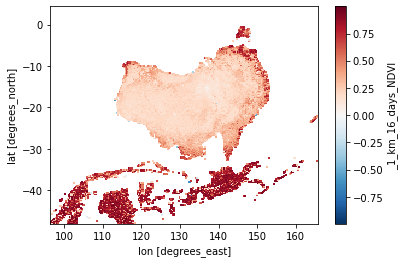

In [52]:
final['_1_km_16_days_NDVI'].plot()

In [38]:
final_df = final.to_dataframe()

In [54]:
final_df.to_parquet('../../finalproj_data/final_parquet.parquet')

In [42]:
# final_df.to_csv('../../finalproj_data/final.csv')

In [41]:
# final.to_netcdf('../../finalproj_data/final.nc')

### Understand how ndimage zoom actually worked, particularly for active fire data

In [40]:
final_df.reset_index(inplace = True)
final_df.head()

In [42]:
final_df['FireMask'].value_counts()

3.0    25920
5.0     9958
4.0     3971
Name: FireMask, dtype: int64

In [46]:
viirs_df = viirs.to_dataframe()

In [ ]:
viirs_df